# Color enhancement

In [1]:
# load helper functions
%run -i "0. Functions_Clases Pipeline.py"

# Load Camera calibration params
und_images = pickle.load(open( "pickle_data/undistorted_images.p", "rb" ) )

[NbConvertApp] Converting notebook 0. Functions_Clases Pipeline.ipynb to script
[NbConvertApp] Writing 20331 bytes to 0. Functions_Clases Pipeline.py


## HLS whithe and yellow filtering

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

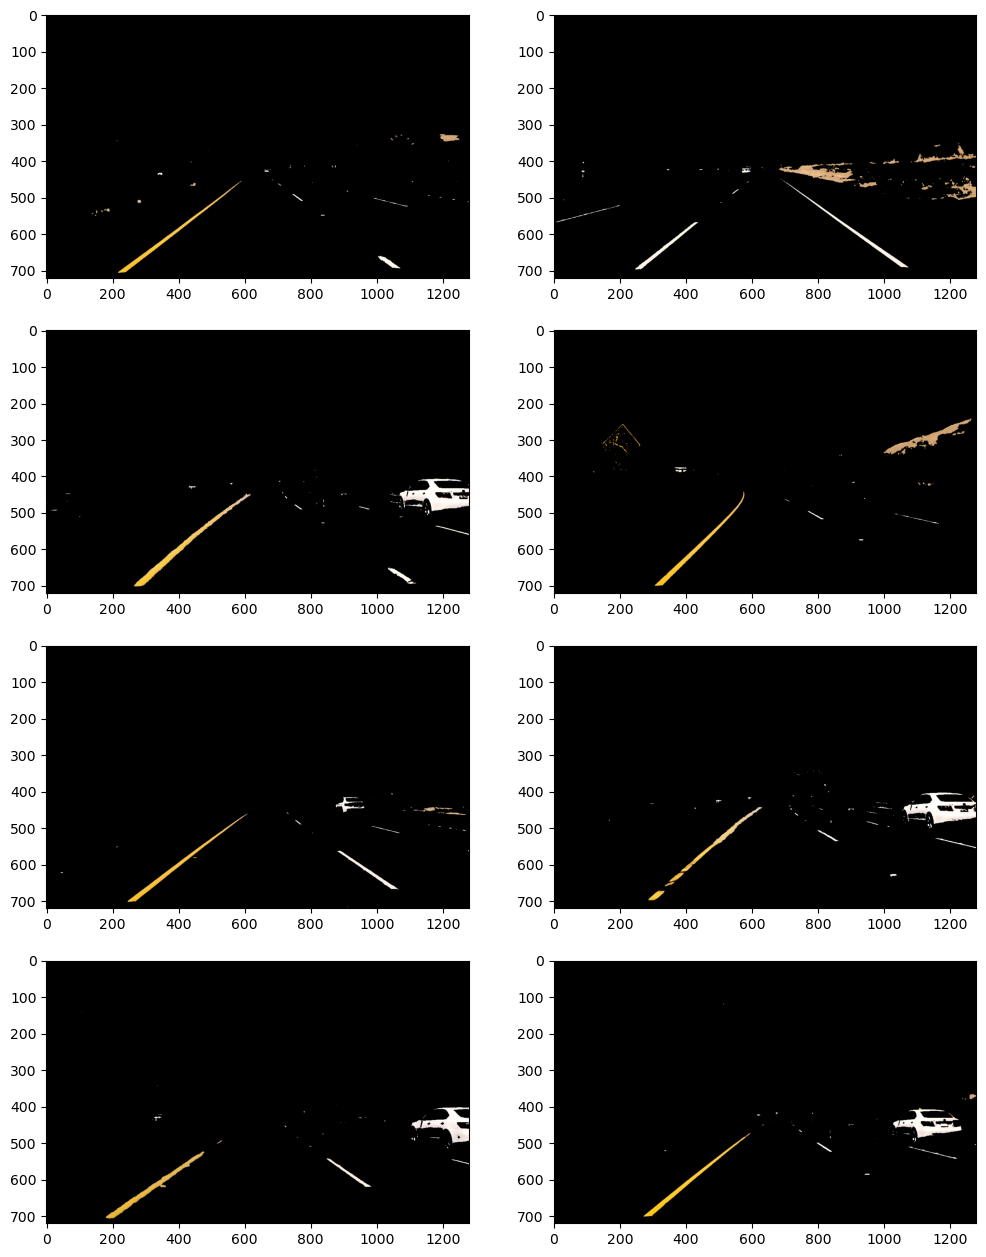

In [2]:
hls_images=[]


for img in und_images:
    imagehls = colorEnhancement(img)
    hls_images.append(imagehls)
        
displayListImages(hls_images,cols=2,cmap='gray',figSize=[12,8])

## Grayscale

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

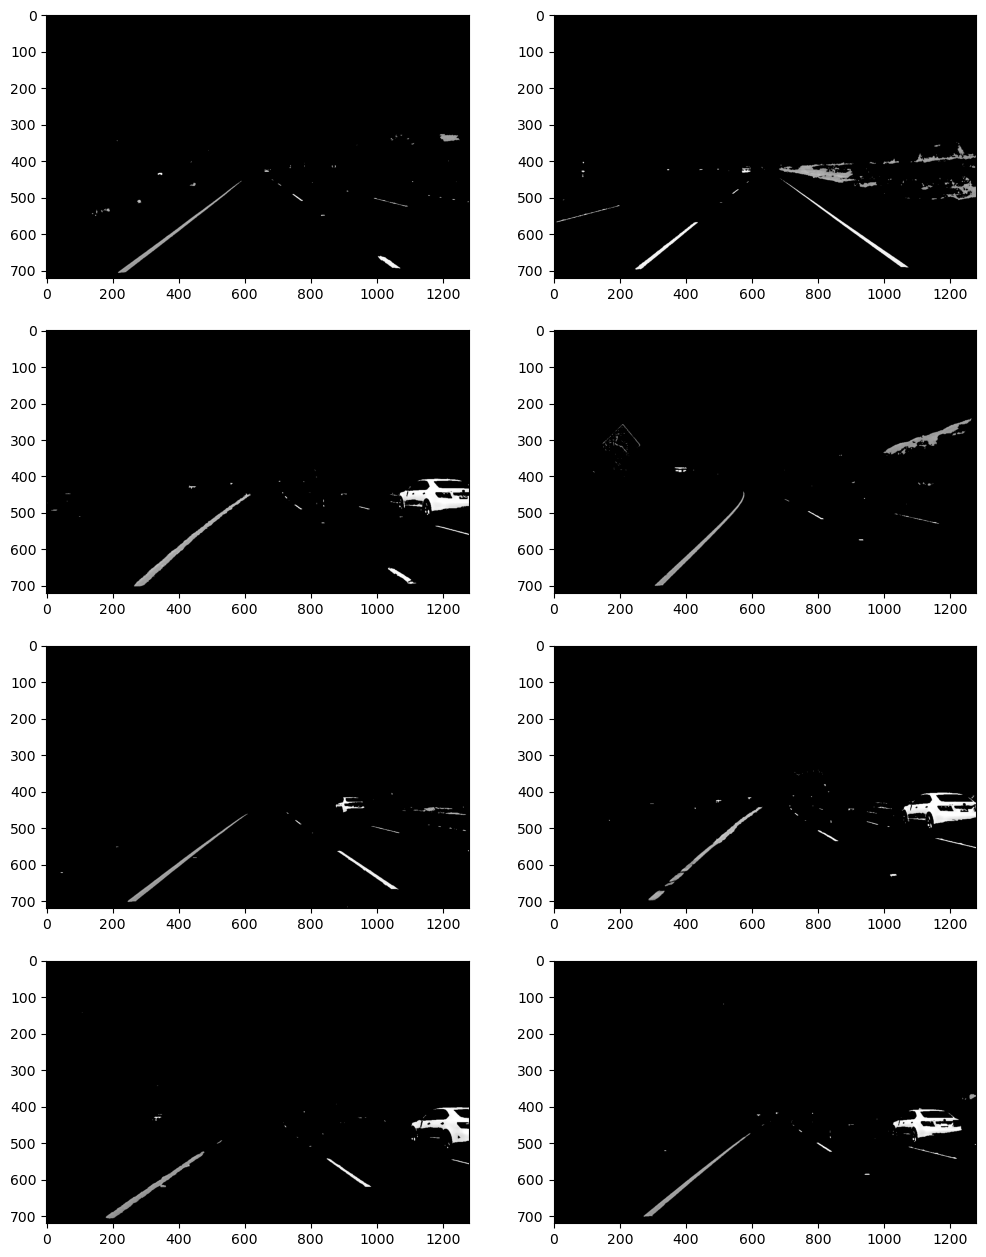

In [3]:
gray_images=[]

for img in hls_images:
    imageGray = grayscale(img)
    gray_images.append(imageGray)
        
displayListImages(gray_images,cols=2,cmap='gray',figSize=[12,8])

## Gaussian blur

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

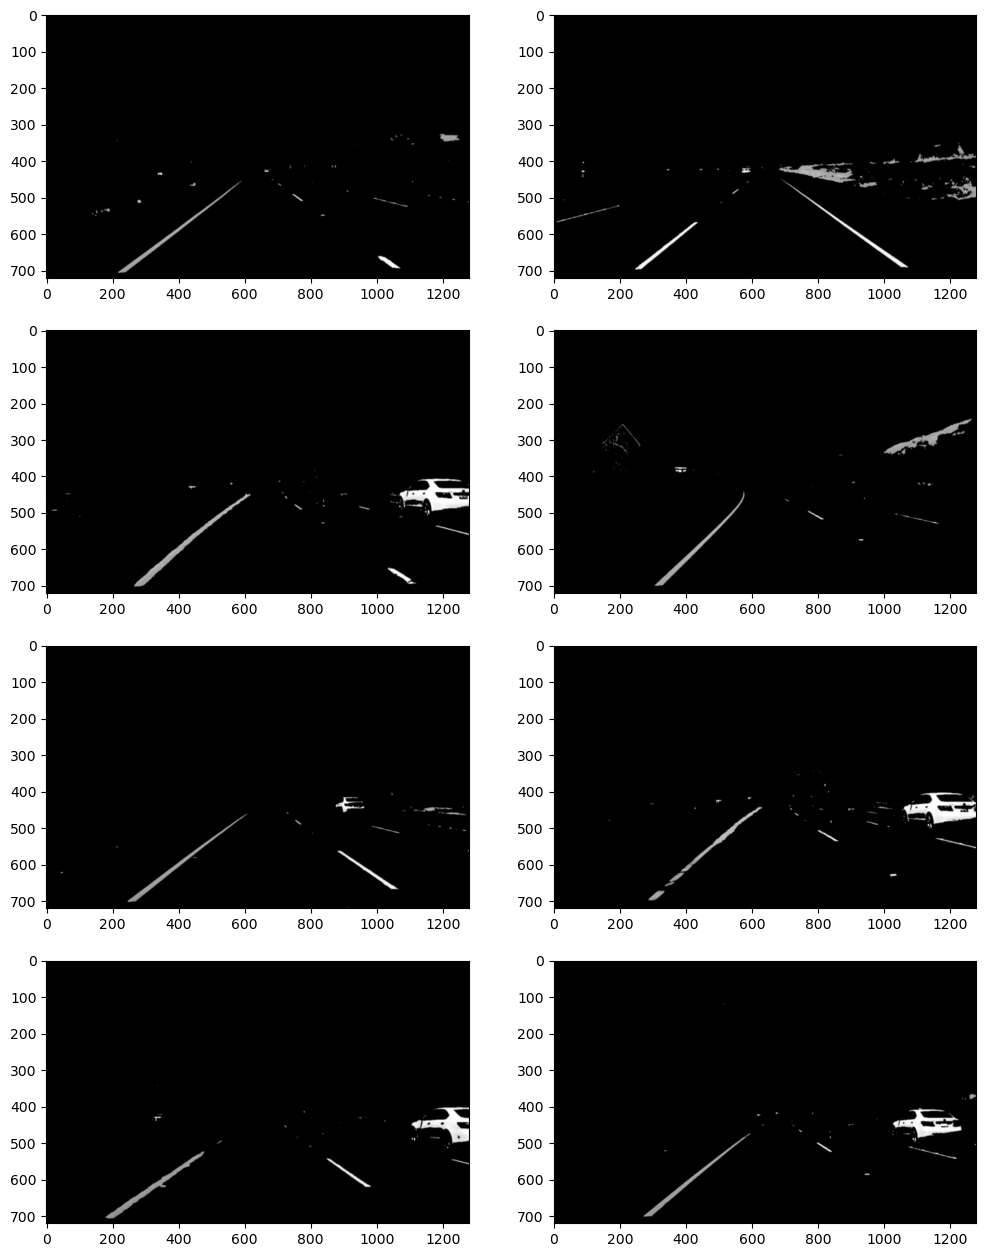

In [4]:
gauss_images=[]

gaussCoeff = 5

for img in gray_images:
    imageGauss = gaussian_blur(img,gaussCoeff)
    gauss_images.append(imageGauss)
        
displayListImages(gauss_images,cols=2,cmap='gray',figSize=[12,8])

## Dump data

In [5]:
pickle.dump( gauss_images, open( "pickle_data/gauss_images.p", "wb" ) )

***

## Images Report

In [6]:
path = './output_images/'


for i in range(len(hls_images)):
    write_name = 'hls_images_'+str(i)+'.jpg'
    im_rgb = cv2.cvtColor(hls_images[i], cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(path , write_name), im_rgb)
    
for i in range(len(gauss_images)):
    write_name = 'gauss_images_'+str(i)+'.jpg'
    cv2.imwrite(os.path.join(path , write_name), gauss_images[i])